# Mid term November 15, 2024

In [1]:
import sympy
import math
from IPython.display import display, Math
from robotic.manipulator import JointType, Manipulator
from robotic.utils import draw_frame
from robotic.transformations import (
    Axis,
    EulerOrder,
    EulerSequence,
    HomogeneousTransformation,
    Rotation,
    Translation,
    X,
    Y,
    Z,
)


# Excercise 1

In [2]:
alpha, beta, phi, chi, psi = sympy.symbols("alpha beta phi chi psi")

In [ ]:
r_1 = Rotation.from_axis_angle(Z, alpha) @ Rotation.from_axis_angle(Y, beta)
r_1

Matrix([
[cos(alpha)*cos(beta), -sin(alpha), sin(beta)*cos(alpha)],
[sin(alpha)*cos(beta),  cos(alpha), sin(alpha)*sin(beta)],
[          -sin(beta),           0,            cos(beta)]])

In [ ]:
r_2 = Rotation.from_euler((phi, chi, psi), EulerSequence.XYZ, order=EulerOrder.FIXED)
r_2

Matrix([
[                              cos(chi)*cos(psi),                              -sin(psi)*cos(chi),           sin(chi)],
[ sin(chi)*sin(phi)*cos(psi) + sin(psi)*cos(phi), -sin(chi)*sin(phi)*sin(psi) + cos(phi)*cos(psi), -sin(phi)*cos(chi)],
[-sin(chi)*cos(phi)*cos(psi) + sin(phi)*sin(psi),  sin(chi)*sin(psi)*cos(phi) + sin(phi)*cos(psi),  cos(chi)*cos(phi)]])

In [ ]:
Rotation.from_euler((psi, chi, phi), EulerSequence.ZYX, order=EulerOrder.MOVING)

Matrix([
[                              cos(chi)*cos(psi),                              -sin(psi)*cos(chi),           sin(chi)],
[ sin(chi)*sin(phi)*cos(psi) + sin(psi)*cos(phi), -sin(chi)*sin(phi)*sin(psi) + cos(phi)*cos(psi), -sin(phi)*cos(chi)],
[-sin(chi)*cos(phi)*cos(psi) + sin(phi)*sin(psi),  sin(chi)*sin(psi)*cos(phi) + sin(phi)*cos(psi),  cos(chi)*cos(phi)]])

In [ ]:
(phi, chi, psi), *_ = r_1.to_euler(sequence=EulerSequence.XYZ, order=EulerOrder.FIXED)
display(Math(r"\phi = " + f"{phi}"))
display(Math(r"\chi = " + f"{chi}"))
display(Math(r"\psi = " + f"{psi}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
numerical_values = {"alpha": sympy.pi / 4, "beta": -sympy.pi / 3}

display(Math(r"\phi = " + f"{phi.subs(numerical_values).evalf()}"))
display(Math(r"\chi = " + f"{chi.subs(numerical_values).evalf()}"))
display(Math(r"\psi = " + f"{psi.subs(numerical_values).evalf()}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Excercise 2

In [ ]:
gamma, delta = sympy.symbols("gamma delta")
v = Axis(1 / sympy.sqrt(2), -1 / sympy.sqrt(2), 0)
rotation = Rotation.from_axis_angle(v, delta) @ Rotation.from_axis_angle(X, gamma)
rotation

Matrix([
[  cos(delta)/2 + 1/2, (cos(delta)/2 - 1/2)*cos(gamma) - sqrt(2)*sin(delta)*sin(gamma)/2, -(cos(delta)/2 - 1/2)*sin(gamma) - sqrt(2)*sin(delta)*cos(gamma)/2],
[  cos(delta)/2 - 1/2, (cos(delta)/2 + 1/2)*cos(gamma) - sqrt(2)*sin(delta)*sin(gamma)/2, -(cos(delta)/2 + 1/2)*sin(gamma) - sqrt(2)*sin(delta)*cos(gamma)/2],
[sqrt(2)*sin(delta)/2,           sqrt(2)*sin(delta)*cos(gamma)/2 + sin(gamma)*cos(delta),           -sqrt(2)*sin(delta)*sin(gamma)/2 + cos(delta)*cos(gamma)]])

In [ ]:
rotation.subs({"gamma": -sympy.pi / 2, "delta": sympy.pi / 3}).evalf().round()

Matrix([
[  0.75, 0.6124,  -0.25],
[ -0.25, 0.6124,   0.75],
[0.6124,   -0.5, 0.6124]])

In [ ]:
r, theta = (
    rotation.subs({"gamma": -sympy.pi / 2, "delta": sympy.pi / 3})
    .evalf()
    .to_axis_angle()
)
display(Math(r"\bold{r} = " + f"{r}"))
display(Math(r"\theta = " + f"{theta}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 4


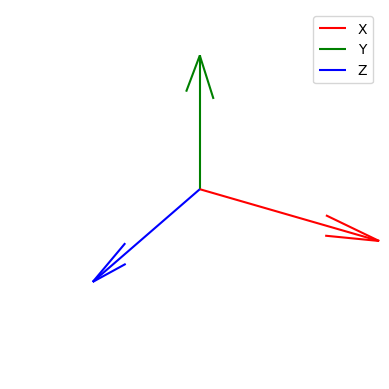

In [20]:
world_frame = draw_frame()

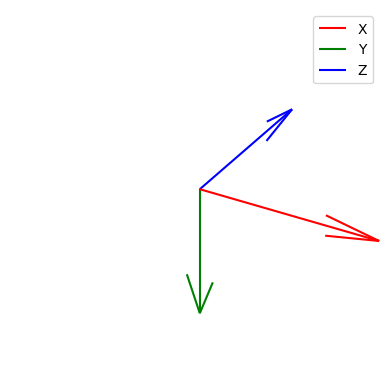

In [ ]:
r_0 = Rotation.from_axis_angle(X, sympy.pi)
t_0 = draw_frame(r_0, basis=world_frame)

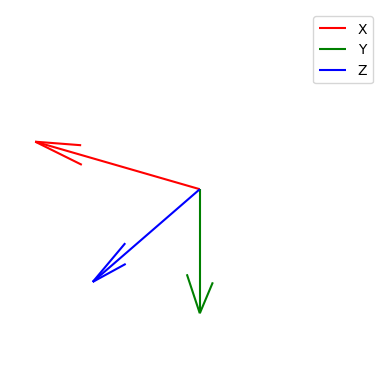

In [ ]:
r_1 = Rotation.from_axis_angle(Y, sympy.pi)
t_1 = draw_frame(r_1, basis=t_0)

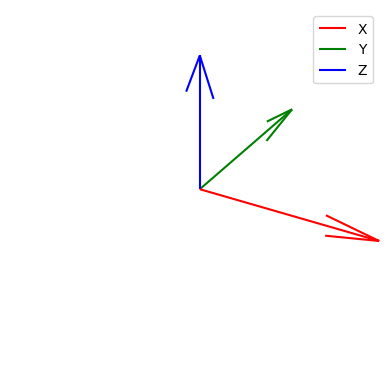

In [49]:
r_2 = Rotation.from_axis_angle(X, sympy.pi/2) @ Rotation.from_axis_angle(Z, sympy.pi)
t_2 = draw_frame(r_2, basis=t_1)

In [63]:
x_rotations =  [
    r_1.to_euler(sequence=EulerSequence.XYZ, order=EulerOrder.FIXED)[0][0],
    r_2.to_euler(sequence=EulerSequence.XYZ, order=EulerOrder.FIXED)[0][0],
]
x_offsets = [sympy.symbols("L"),-sympy.symbols("L")]
man = Manipulator([JointType.REVOLUTE,JointType.REVOLUTE],x_rotations=x_rotations,x_offsets=x_offsets)

man.dh_table()
sympy.simplify(man.dh_matrix())

Matrix([
[cos(q_1 - q_2),  0, -sin(q_1 - q_2), L*(cos(q_1) - cos(q_1 - q_2))],
[sin(q_1 - q_2),  0,  cos(q_1 - q_2), L*(sin(q_1) - sin(q_1 - q_2))],
[             0, -1,               0,                             0],
[             0,  0,               0,                             1]])

# Exercise 6

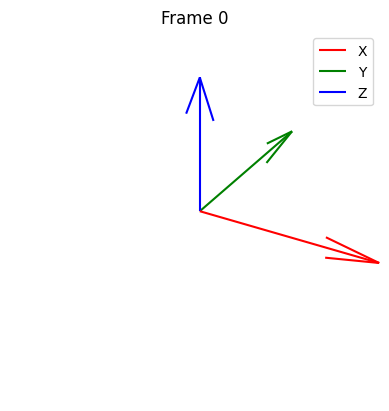

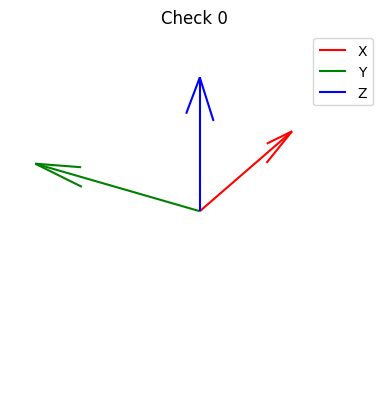

In [ ]:
r_0 = Rotation.identity()
t_0 = draw_frame(basis=r_0, label="Frame 0")
check_0 = draw_frame(
    Rotation.from_axis_angle(Z, sympy.pi / 2), basis=r_0, label="Check 0"
)

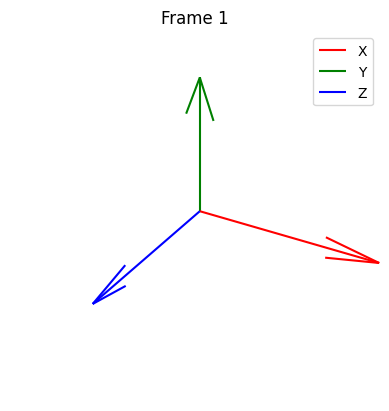

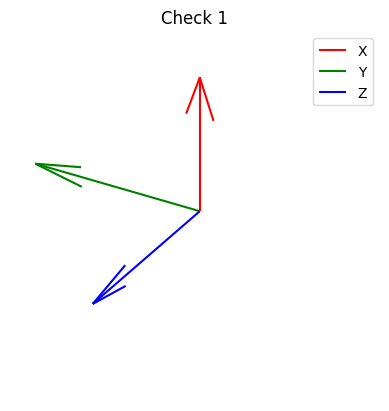

In [ ]:
r_1 = Rotation.from_axis_angle(X, sympy.pi / 2)
t_1 = draw_frame(r_1, basis=t_0, label="Frame 1")
check_1 = draw_frame(
    Rotation.from_axis_angle(Z, sympy.pi / 2), basis=t_1, label="Check 1"
)

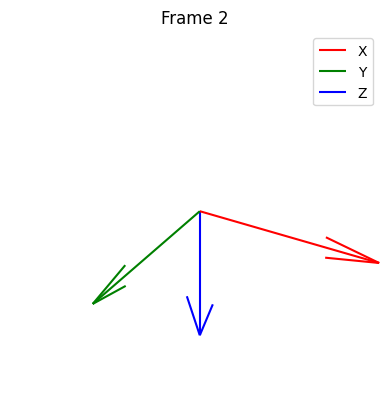

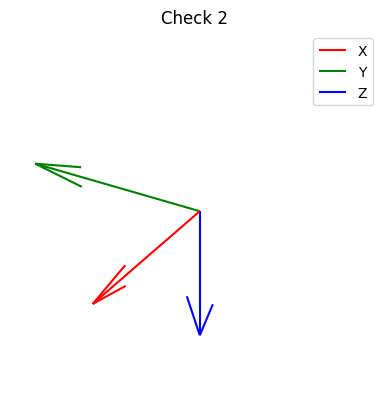

In [ ]:
r_2 = Rotation.from_axis_angle(X, sympy.pi / 2)
t_2 = draw_frame(r_2, basis=t_1, label="Frame 2")
check_2 = draw_frame(
    Rotation.from_axis_angle(Z, sympy.pi / 2), basis=t_2, label="Check 2"
)

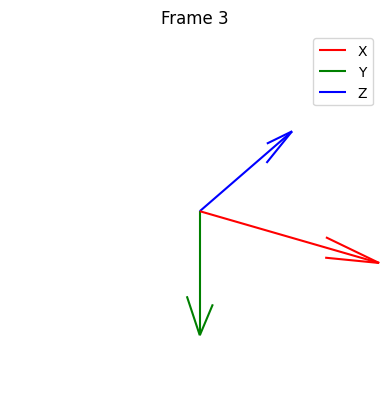

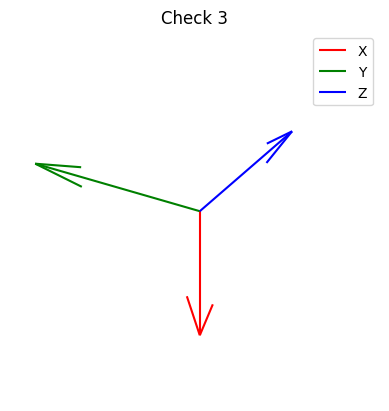

In [ ]:
r_3 = Rotation.from_axis_angle(X, sympy.pi / 2)
t_3 = draw_frame(r_3, basis=t_2, label="Frame 3")
check_3 = draw_frame(
    Rotation.from_axis_angle(Z, sympy.pi / 2), basis=t_3, label="Check 3"
)

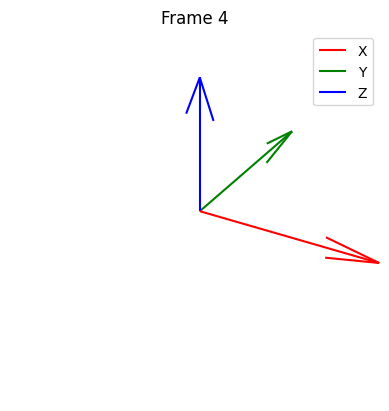

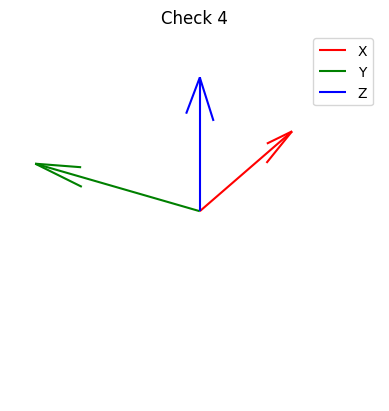

In [ ]:
r_4 = Rotation.from_axis_angle(X, sympy.pi / 2)
t_4 = draw_frame(r_4, basis=t_3, label="Frame 4")
check_4 = draw_frame(
    Rotation.from_axis_angle(Z, sympy.pi / 2), basis=t_4, label="Check 4"
)

In [ ]:
joint_types = [
    JointType.REVOLUTE,
    JointType.REVOLUTE,
    JointType.REVOLUTE,
    JointType.REVOLUTE,
    JointType.REVOLUTE,
]
x_rotations = [
    r_1.to_euler(sequence=EulerSequence.XYZ, order=EulerOrder.FIXED)[0][0],
    r_2.to_euler(sequence=EulerSequence.XYZ, order=EulerOrder.FIXED)[0][0],
    r_3.to_euler(sequence=EulerSequence.XYZ, order=EulerOrder.FIXED)[0][0],
    r_4.to_euler(sequence=EulerSequence.XYZ, order=EulerOrder.FIXED)[0][0],
    0,
]
z_offsets = [sympy.symbols("d_1"), 0, sympy.symbols("d_2"), 0, sympy.symbols("d_3")]
man = Manipulator(joint_types, x_rotations=x_rotations, z_offsets=z_offsets)
man.dh_table()

   a alpha    d theta      type
0  0  pi/2  d_1   q_1  REVOLUTE
1  0  pi/2    0   q_2  REVOLUTE
2  0  pi/2  d_2   q_3  REVOLUTE
3  0  pi/2    0   q_4  REVOLUTE
4  0     0  d_3   q_5  REVOLUTE

In [ ]:
man.dh_matrix().evalf().subs(
    {"q_1": 0, "q_2": 0, "q_3": 0, "q_4": 0, "q_5": 0, "d_1": 1, "d_3": 1, "d_2": -1}
)

Matrix([
[1, 0, 0,   0],
[0, 1, 0,   0],
[0, 0, 1,   3],
[0, 0, 0, 1.0]])